# "Zuber Market Study: Chicago Ride Patterns"

## Introduction

The dataset analyzed for the project is from competitors of a new ride-sharing company, Zuber that is launching in Chicago. The task is to find and analyze patterns to understand passenger preferences and the impact of external factors of rides such as weather impact on ride frequency. 

## Data Overview

In [1]:
# import necessary libraries
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### Load the Datasets

In [5]:
company_trips = pd.read_csv('moved_project_sql_result_01.csv')
trips_dropoff_locations = pd.read_csv('moved_project_sql_result_04.csv')
weather_conditions_duration = pd.read_csv('moved_project_sql_result_07.csv')

In [8]:
# Display the first few rows of the dataframes
display(company_trips.head())
display(trips_dropoff_locations.head())
display(weather_conditions_duration.head())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


## Exploratory Data Analysis

### Data preprocessing

#### Column Names

In [9]:
# Display the column names of the company_trips dataframe
column_names = company_trips.columns.tolist()
display(column_names)

['company_name', 'trips_amount']

In [10]:
# Display the column names of the trips_dropoff_locations dataframe
column_names = trips_dropoff_locations.columns.tolist()
display(column_names)

['dropoff_location_name', 'average_trips']

In [11]:
# Display the column names of the weather_conditions_duration dataframe
column_names = weather_conditions_duration.columns.tolist()
display(column_names)

['start_ts', 'weather_conditions', 'duration_seconds']

#### Shapes of all the DataFrames

In [12]:
# Display the shape of the company_trips dataframe
n_rows, n_cols = company_trips.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 64 rows and 2 columns


In [13]:
# Display the shape of the trips_dropoff_locations dataframe
n_rows, n_cols = trips_dropoff_locations.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 94 rows and 2 columns


### Informative Summary of all the DataFrames

In [14]:
# Display the informative summary of the company_trips dataframe
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
# Display the informative summary of the trips_dropoff_locations dataframe
trips_dropoff_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
# Display the informative summary of the weather_conditions_duration dataframe
weather_conditions_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
# Convert the 'start_ts' column to datetime format in the weather_conditions_duration dataframe
weather_conditions_duration['start_ts'] = pd.to_datetime(weather_conditions_duration['start_ts'])

# Check the data types of the columns in the weather_conditions_duration dataframe
weather_conditions_duration.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

In 'weather_condtions_duration' dataFrame, I changed the dtype of start_ts from object to datetime64. 

### Descriptive Statistics of all the DataFrames

In [18]:
# Display descriptive statistics for the company_trips dataframe
company_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [19]:
# Display descriptive statistics for the trips_dropoff_locations dataframe
trips_dropoff_locations.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Duplicates

In [20]:
# Check for duplicates in the company_trips dataframe
duplicated_company_trips = company_trips[company_trips.duplicated()]
display(f"Number of duplicated data: {duplicated_company_trips.shape[0]}")

'Number of duplicated data: 0'

In [21]:
# Check for duplicates in the trips_dropoff_locations dataframe
duplicated_trips_dropoff_locations = trips_dropoff_locations[trips_dropoff_locations.duplicated()]
display(f"Number of duplicated data: {duplicated_trips_dropoff_locations.shape[0]}")

'Number of duplicated data: 0'

### Missing Values

In [22]:
# Check for missing values in the company_trips dataframe
display(company_trips.isna().sum())

company_name    0
trips_amount    0
dtype: int64

In [23]:
# Check for missing values in the trips_dropoff_locations dataframe
display(trips_dropoff_locations.isna().sum())

dropoff_location_name    0
average_trips            0
dtype: int64

## Data Analysis

### Identify the top 10 companies with the most rides

In [24]:
# Top 10 companies with the most rides
top_10_companies_rides = company_trips.head(10)

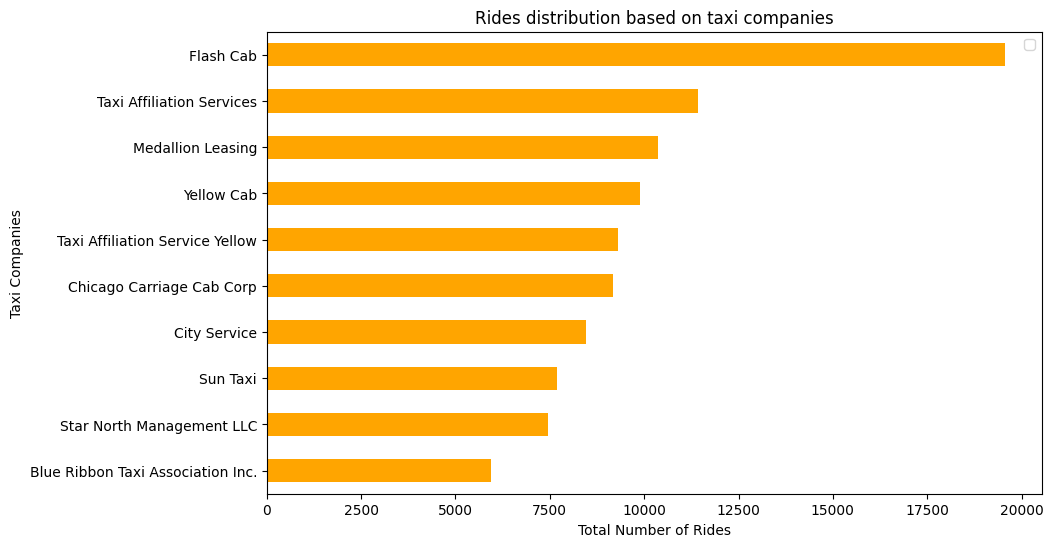

In [ ]:
# Create a bar plot for the top 10 companies with the most rides
top_10_companies_rides.sort_values(by='trips_amount').plot(x='company_name',
                  y='trips_amount', 
                  kind='barh', # horizontal bar chart
                  figsize=(10,6),
                  color='orange')
plt.title('Rides distribution based on taxi companies')
plt.ylabel('Taxi Companies')
plt.xlabel('Total Number of Rides')
plt.legend('')
plt.show()

The graph above shows the rides distribution based on taxi companies on November 15-16, 2017. It can be known that company named 'Flash Cab', has the highest number of rides when compared to other companies which are among the top 10 companies in terms of total number of rides. Also, the number of rides of the company 'Taxi Affiliation Services' which is second company after 'Flash Cab' has almost half of the number of rides 'Flash Cab' had. 

### Identify the top 10 neighborhoods in terms of drop offs


In [28]:
# Top 10 drop-off locations with the most rides
top_dropoff_location = trips_dropoff_locations.sort_values(by='average_trips', ascending=False).head(10)
display(top_dropoff_location)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


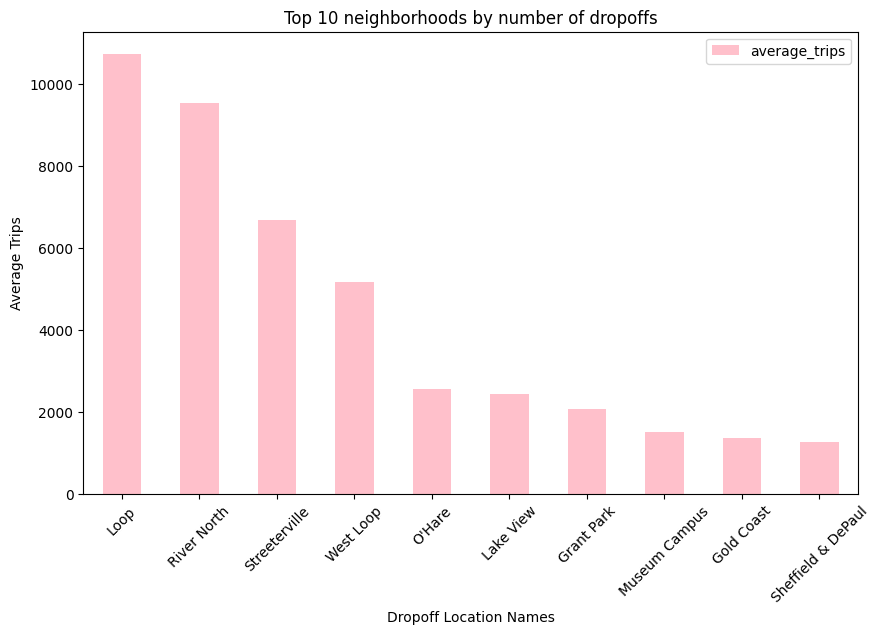

In [29]:
# Create a bar plot for the top 10 drop-off locations with the most rides
top_dropoff_location.plot(x='dropoff_location_name', 
                          y='average_trips',
                          kind='bar',
                          figsize=(10,6),
                          color='pink')
plt.title('Top 10 neighborhoods by number of dropoffs')
plt.xlabel('Dropoff Location Names')
plt.ylabel('Average Trips')
plt.xticks(rotation=45)
plt.show()

The above graph shows the top 10 Chicago neighborhoods by number of dropoffs. Based on the graph above, it is known that Loop neighborhood had the highest number of dropoffs, which shows that there were more people going to this neighborhood compared to the rest. Followed by Loop neighborhood, its River North, Streetville, and West Loop neighborhoods. Following West Loop, its O'Hare where the number of dropoffs are almost half to that of in West Loop which is similar to that in Lake View and Grant Park. 

## Test the hypotheses

**HO:** The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is equal to that on non-rainy Saturdays. <br>
**HA:** The average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is not equal to that on non-rainy Saturdays <br>
**Statistical test = t-test** <br>
**Alpha value = 0.05**

In [30]:
# Converting the 'day_of_week' column to datetime format in the weather_conditions_duration dataframe
weather_conditions_duration['day_of_week'] = weather_conditions_duration['start_ts'].dt.day_name()

In [34]:
# Filter the weather_conditions_duration dataframe for Saturdays
saturdays = weather_conditions_duration[weather_conditions_duration['day_of_week'] == 'Saturday']
display(saturdays.head())

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


In [37]:
# Display the duration of rides in seconds for Saturdays during bad weather
bad_weather = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']
display(bad_weather.head())

6     2969.0
30    1980.0
34    2460.0
51    2760.0
52    2460.0
Name: duration_seconds, dtype: float64

In [38]:
# Display the average duration of rides in seconds for Saturdays during bad weather
bad_weather.mean()

2427.2055555555557

In [40]:
# Display the duration of rides in seconds for Saturdays during good weather
good_weather = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']
display(good_weather.head())

0    2410.0
1    1920.0
2    1543.0
3    2512.0
4    1440.0
Name: duration_seconds, dtype: float64

In [41]:
# Display the average duration of rides in seconds for Saturdays during good weather
good_weather.mean()

1999.6756756756756

In [42]:
# Perform a t-test to compare the average duration of rides during bad and good weather

# Set the significance level
alpha = 0.05

# Perform the t-test
results = st.ttest_ind(bad_weather, good_weather)

# Display the results of the t-test
print('t-statistic:', results.statistic)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

t-statistic: 6.946177714041499
p-value: 6.517970327099473e-12
We reject the null hypothesis


As the p-value is less than alpha, we can reject the null hypothesis. This shows that the average duration of rides from the  Loop to O'Hare International Airport on rainy Saturdays is not equal to that on non-rainy Saturdays. The result makes sense as due to rain there is less visibility and so more traffic and thus the duration of a ride increases. 

## Overall Conclusion

The project is based on analyzing three datas which are retrieved from the SQL tasks that are done previously to determine patterns in the available information. The SQL tasks were based on the database from competitors of a new ride-sharing company, Zuber which is launching in Chicago. Along with determining the patterns, one is tried to understand passenger preferences and the impact of external factors on rides.

Using one of the datas a graph showing the rides distribution of different taxi companies in Chicago on November 15-16, 2017 was made. It can be known that company named 'Flash Cab' had the highest number of rides when compared to other companies which are among the top 10 companies in terms of total number of rides. Also, company 'Taxi Affiliation Services' is right after 'Flash Cab' in the graph, but had almost half of the number of rides 'Flash Cab' company had. From which it can be said that company 'Flash Cab' is more famous in Chicago in terms of rides compared to other companies in business. 

Another graph was made which shows the top 10 Chicago neighborhoods by number of dropoffs. Based on the graph, it was known that Loop neighborhood had the highest number of dropoffs, which shows that in Chicago there were more people going to this neighborhood compared to the rest. Followed by Loop neighborhood, its River North, Streetville, and West Loop neighborhoods and lastly its O'Hare where the number of dropoffs are almost half to that of in West Loop which is similar to that in Lake View and Grant Park.



Lastly, a t-test was done to test the hypotheses whether the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is equal or not to that on non-rainy Saturdays. By doing t-test as the p-value is less than alpha, we  reject the null hypothesis. This shows that the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays is not equal to that on non-rainy Saturdays. Also from the average number of rides, it was known that the average duration of rides during rainy Saturdays were more than that of non-rainy Saturdays. This make sense as due to rain there is less visibility and so more traffic and thus the duration of a ride increases. 